In [ ]:
%matplotlib inline
!pip install geopandas
import pandas as pd
import geopandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install contextily
import contextily as ctx

[GeopandasEsercizio1](https://colab.research.google.com/drive/1KnBqqiUtiCa-KovqoFidv_XIhY8lTWTY#scrollTo=4F5_sQTzu2Ni)

[GeoPandasEsercizio2](https://colab.research.google.com/drive/1GxlRP2a-fKe1xD1JqFUndvvGFQdXz1Qt)

visualizzi la mappa d'Italia con tutte le regioni. Fare in modo che i confini delle regioni siano in blu e che sia visibile al di sotto delle regioni la cartina geografica dell'Italia

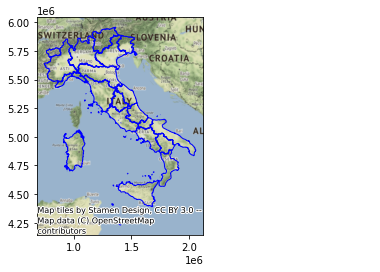

In [ ]:
italia = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Reg01012021_g/Reg01012021_g_WGS84.dbf')
ax = italia.to_crs(epsg=3857).plot(edgecolor='b',facecolor='none')
ctx.add_basemap(ax)

sostituire alla cartina geografica dell'Italia un altro tipo di mappa

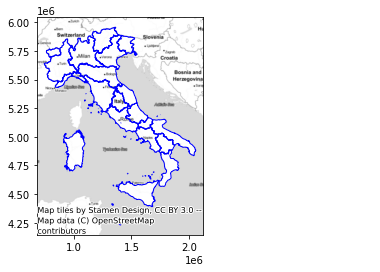

In [ ]:
ax = italia.to_crs(epsg=3857).plot(edgecolor='b',facecolor='none')

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)


visualizzare le province della Lombardia su una mappa di contextily

In [ ]:
province = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/ProvCM01012021_g/ProvCM01012021_g_WGS84.dbf')
province

COD_RIP  ...                                           geometry
0          1  ...  POLYGON ((411015.006 5049970.983, 411266.039 5...
1          1  ...  POLYGON ((438328.612 5087208.215, 439028.888 5...
2          1  ...  POLYGON ((460929.542 5076320.298, 461165.259 5...
3          1  ...  MULTIPOLYGON (((378673.492 4958865.159, 378928...
4          1  ...  POLYGON ((425041.329 4997628.309, 424948.989 4...
..       ...  ...                                                ...
102        1  ...  POLYGON ((457749.464 5145501.795, 458662.395 5...
103        1  ...  POLYGON ((519754.706 5065242.380, 520199.702 5...
104        3  ...  POLYGON ((884760.019 4804406.440, 885511.011 4...
105        4  ...  POLYGON ((1081237.144 4611047.023, 1081399.393...
106        5  ...  MULTIPOLYGON (((448813.650 4301762.751, 448823...

[107 rows x 13 columns]

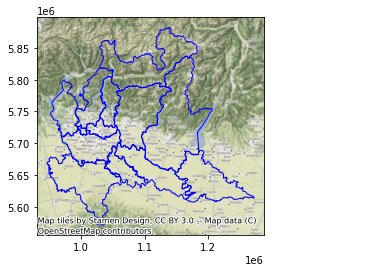

In [ ]:
ax = province[province.within(italia[italia.DEN_REG=='Lombardia'].geometry.squeeze())].to_crs(epsg=3857).plot(edgecolor='b',facecolor='none')
ctx.add_basemap(ax)

visualizzare la provincia di Milano su una mappa di contextily con i confini amministrativi del comune di Milano. Usare colori adatti

In [ ]:
provincia_milano = province[province.DEN_UTS=='Milano']
provincia_milano

COD_RIP  ...                                           geometry
14        1  ...  MULTIPOLYGON (((538136.289 5004372.814, 539162...

[1 rows x 13 columns]

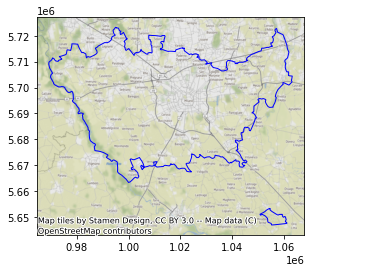

In [ ]:
ax = provincia_milano.to_crs(epsg=3857).plot(edgecolor='b',facecolor='none')
ctx.add_basemap(ax)

utilizzando le informazioni geografiche riguardanti i quartieri di Milano, visualizzare sia i confini di Milano sia i confini dei quartieri. 


In [ ]:
quartieri = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Com01012021_g/Com01012021_g_WGS84.dbf')


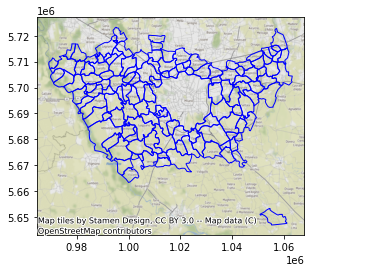

In [ ]:
ax = quartieri_milano = quartieri[quartieri.within(provincia_milano.geometry.squeeze())].to_crs(epsg=3857).plot(edgecolor='b',facecolor='none')
ctx.add_basemap(ax)

far inserire all'utente una provincia della Lombardia e visualizzare tutte le province lombarde confinanti. Controllare che la provincia inserita sia effettivamente in Lombardia.

Milano


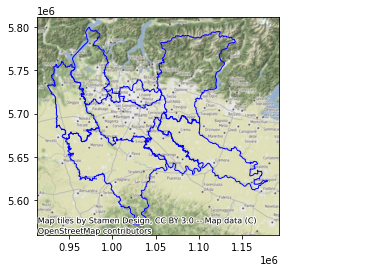

In [ ]:
Prov_Utente = input()
if Prov_Utente not in province[province.within(italia[italia.DEN_REG=='Lombardia'].geometry.squeeze())]['DEN_UTS'].tolist():
  print('non trovato')
else:
 ax = province[province.touches(province[province.DEN_UTS==Prov_Utente].geometry.squeeze())].to_crs(epsg=3857).plot(edgecolor='b',facecolor='none')
 ctx.add_basemap(ax)

[Verifica_GeoPandas_A_senza_soluzioni](https://colab.research.google.com/drive/1GKH6Ca5d5zyWJGZnRLXXxtKOJidPaa1v)

[Verifica_GeoPandasB_senza_soluzioni](https://colab.research.google.com/drive/1Li2AYDVK1UPCvrRGVrlq1wAX2Nr6GDAD)

[Verifica_GeoPandas_C_senza_soluzioni](https://colab.research.google.com/drive/156IpFWhh1odKCigEUfCinNYk70OTcAA_)

visualizzi i parchi di Milano e i comuni che vi fanno parte

In [ ]:
parchi = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Parchi_regionali_e_nazionali_polygon/Parchi_regionali_e_nazionali_polygon.dbf')
comuni =  geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Com01012021_g')
quartieri = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm.zip')
province = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/ProvCM01012021_g')


In [ ]:
comune_Milano = comuni[comuni.COMUNE=='Milano'] #troviamo prima il comune di Milano
comune_Milano

COD_RIP  ...                                           geometry
1882        1  ...  POLYGON ((513714.538 5042508.056, 513985.199 5...

[1 rows x 13 columns]

In [ ]:
Parchi_Milano = parchi[parchi.intersects(comune_Milano.geometry.squeeze())] #troviamo i parchi che passano sul comune di Milano
Parchi_Milano

FID  ...                                           geometry
20   21  ...  POLYGON ((516502.662 5041742.040, 516403.321 5...
21   22  ...  POLYGON ((533691.079 5042919.602, 533758.703 5...

[2 rows x 11 columns]

In [ ]:
Comuni_Parchi = comuni[comuni.intersects(Parchi_Milano.unary_union)]
Comuni_Parchi

COD_RIP  ...                                           geometry
1811        1  ...  POLYGON ((493446.898 5029705.643, 493602.897 5...
1812        1  ...  POLYGON ((495595.883 5032525.624, 495661.881 5...
1815        1  ...  POLYGON ((496562.280 5041533.478, 496401.277 5...
1816        1  ...  POLYGON ((511386.603 5029333.275, 511518.968 5...
1817        1  ...  POLYGON ((499326.672 5038880.244, 499885.260 5...
...       ...  ...                                                ...
7465        1  ...  POLYGON ((534210.409 5035224.602, 534551.968 5...
7484        1  ...  POLYGON ((534698.954 5033625.792, 534731.476 5...
7486        1  ...  POLYGON ((530678.622 5027337.660, 530960.619 5...
7500        1  ...  POLYGON ((529834.629 5021137.707, 530206.624 5...
7506        1  ...  POLYGON ((534164.595 5029853.641, 534184.596 5...

[88 rows x 13 columns]

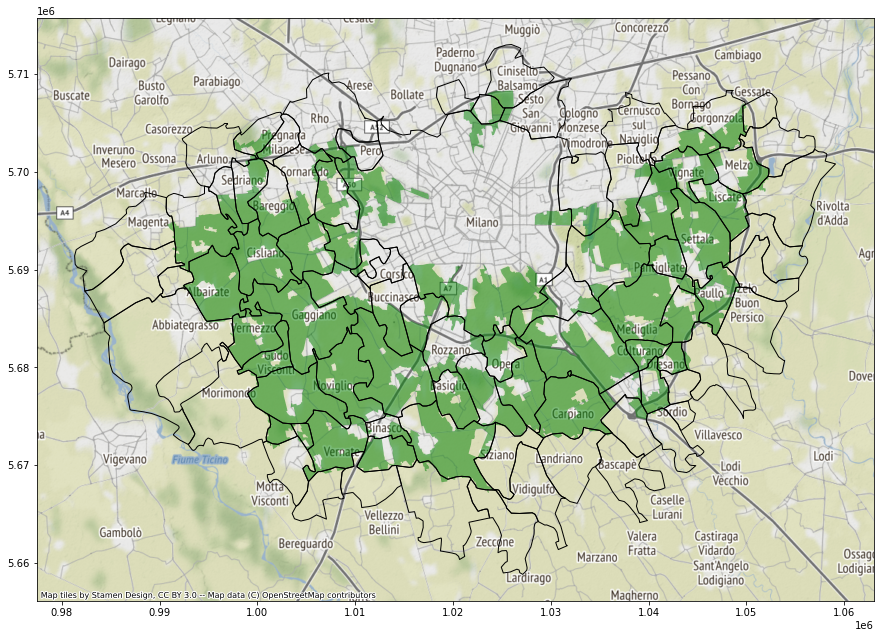

In [ ]:
ax = Parchi_Milano.to_crs(epsg=3857).plot(facecolor='green',alpha=0.5,figsize=(15,15))
Comuni_Parchi.to_crs(epsg=3857).plot(ax=ax,facecolor='none',edgecolor='k')
ctx.add_basemap(ax)

visualizzare i comuni confinanti con milano

In [ ]:
Comuni_confinanti = comuni[comuni.touches(comune_Milano.geometry.squeeze())]
Comuni_confinanti

COD_RIP  ...                                           geometry
1814        1  ...  POLYGON ((506416.116 5045124.529, 506782.458 5...
1816        1  ...  POLYGON ((511386.603 5029333.275, 511518.968 5...
1825        1  ...  POLYGON ((508068.588 5045562.067, 508068.588 5...
1826        1  ...  POLYGON ((514613.122 5043643.623, 515033.668 5...
1828        1  ...  POLYGON ((509908.110 5030714.300, 510291.086 5...
1846        1  ...  POLYGON ((506991.974 5033297.204, 507033.799 5...
1850        1  ...  POLYGON ((521178.812 5044037.362, 521198.630 5...
1853        1  ...  POLYGON ((513324.450 5044373.750, 513413.918 5...
1855        1  ...  POLYGON ((508715.786 5032711.622, 508754.073 5...
1857        1  ...  POLYGON ((502905.966 5034740.413, 503349.392 5...
1887        1  ...  POLYGON ((511193.960 5043607.177, 511523.463 5...
1889        1  ...  POLYGON ((516130.826 5026580.285, 516145.949 5...
1896        1  ...  POLYGON ((504478.722 5041155.559, 504694.690 5...
1897        1  ...  POLYGON ((524640.471 5035256.833, 525021.665 5...
1906        1  ...  POLYGON ((503759.558 5045021.657, 503804.708 5...
1911        1  ...  POLYGON ((512863.590 5027792.280, 513364.365 5...
1913        1  ...  POLYGON ((521244.693 5030939.635, 521404.692 5...
1920        1  ...  POLYGON ((523352.676 5039565.571, 523621.892 5...
1922        1  ...  POLYGON ((520995.577 5044504.342, 520968.724 5...
1924        1  ...  POLYGON ((504240.586 5038799.829, 504418.755 5...
1927        1  ...  POLYGON ((504393.783 5031617.351, 505429.872 5...
1936        1  ...  POLYGON ((523695.531 5041429.575, 523351.165 5...
1942        1  ...  POLYGON ((509363.172 5042554.492, 509538.293 5...

[23 rows x 13 columns]

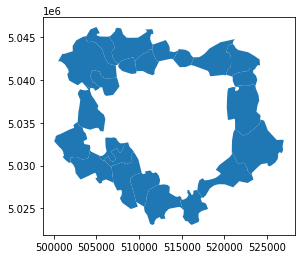

In [ ]:
Comuni_confinanti.plot()

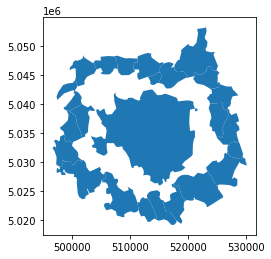

In [ ]:
Comuni_confinanti_confinanti = comuni[comuni.touches(Comuni_confinanti.unary_union)] 
Comuni_confinanti_confinanti.plot()

In [ ]:
Comune_Confinante_piu_grande = Comuni_confinanti[Comuni_confinanti.Shape_Area==Comuni_confinanti.Shape_Area.max()] #caricare il comune confinante più grande
Comune_Confinante_piu_grande

COD_RIP  ...                                           geometry
1897        1  ...  POLYGON ((524640.471 5035256.833, 525021.665 5...

[1 rows x 13 columns]

In [ ]:
Comune_Confinante_piu_piccolo = Comuni_confinanti[Comuni_confinanti.Shape_Area==Comuni_confinanti.Shape_Area.min()] #caricare il comune confinante più piccolo
Comune_Confinante_piu_piccolo

COD_RIP  ...                                           geometry
1942        1  ...  POLYGON ((509363.172 5042554.492, 509538.293 5...

[1 rows x 13 columns]

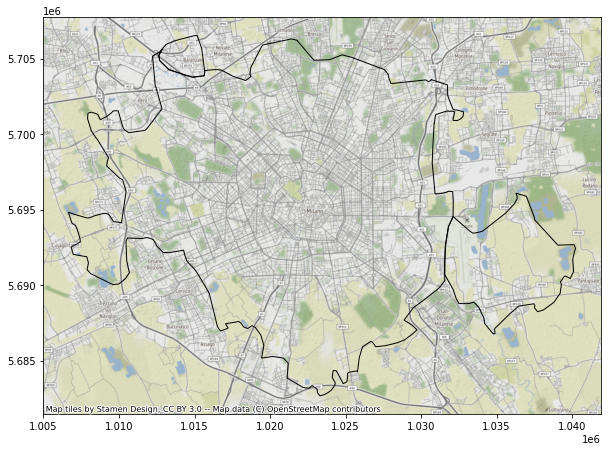

In [ ]:
ax = comune_Milano.to_crs(epsg=3857).plot(facecolor='none',figsize=(10,10),edgecolor='k')
Comune_Confinante_piu_grande.to_crs(epsg=3857).plot(ax=ax,facecolor='none',edgecolor='k')
Comune_Confinante_piu_piccolo.to_crs(epsg=3857).plot(ax=ax,facecolor='none',edgecolor='k')

ctx.add_basemap(ax)

analogo al primo esercizio ma tracciando sulla mappa solo i quartieri di Milano attraversati da parchi 

In [ ]:
QuartieriParchi = quartieri[quartieri.intersects(Parchi_Milano.to_crs(epsg=4326).unary_union)]
QuartieriParchi

ID_NIL  ...                                           geometry
0       48  ...  POLYGON ((9.15422 45.43775, 9.15419 45.43707, ...
1       64  ...  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...
4       84  ...  POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...
5       63  ...  POLYGON ((9.08375 45.48485, 9.08280 45.48521, ...
9       61  ...  POLYGON ((9.11143 45.47640, 9.11193 45.47624, ...
10      60  ...  POLYGON ((9.13020 45.48464, 9.13075 45.48449, ...
11      62  ...  POLYGON ((9.08375 45.48485, 9.08444 45.48459, ...
20      83  ...  POLYGON ((9.17808 45.53479, 9.17807 45.53439, ...
23      47  ...  POLYGON ((9.16112 45.42589, 9.16270 45.42544, ...
24      39  ...  POLYGON ((9.21047 45.39699, 9.21039 45.39698, ...
26      46  ...  POLYGON ((9.16112 45.42589, 9.16056 45.42605, ...
28      88  ...  POLYGON ((9.07309 45.50604, 9.07326 45.50589, ...
30      14  ...  POLYGON ((9.21337 45.52948, 9.21337 45.52948, ...
31      32  ...  POLYGON ((9.26378 45.43251, 9.26384 45.43248, ...
36      87  ...  POLYGON ((9.04687 45.46276, 9.04688 45.46276, ...
38      38  ...  POLYGON ((9.20060 45.43608, 9.20429 45.43642, ...
41      35  ...  POLYGON ((9.23480 45.44588, 9.23480 45.44569, ...
42      54  ...  POLYGON ((9.07736 45.45589, 9.07671 45.45364, ...
46      40  ...  POLYGON ((9.18364 45.40122, 9.18442 45.40004, ...
47      65  ...  POLYGON ((9.09884 45.50652, 9.09884 45.50651, ...
50      41  ...  POLYGON ((9.17334 45.42346, 9.17402 45.42205, ...
52      56  ...  POLYGON ((9.12613 45.46928, 9.12638 45.46851, ...
54      34  ...  POLYGON ((9.24507 45.41742, 9.24303 45.41508, ...
55      85  ...  POLYGON ((9.21711 45.43187, 9.21733 45.43160, ...
59      42  ...  POLYGON ((9.18775 45.43732, 9.18941 45.43729, ...
61      36  ...  POLYGON ((9.21561 45.43849, 9.21685 45.43686, ...
65      55  ...  POLYGON ((9.09315 45.46938, 9.09393 45.46802, ...
66      24  ...  POLYGON ((9.26017 45.47147, 9.26018 45.47143, ...
82      86  ...  POLYGON ((9.13886 45.42855, 9.13901 45.42836, ...

[29 rows x 9 columns]

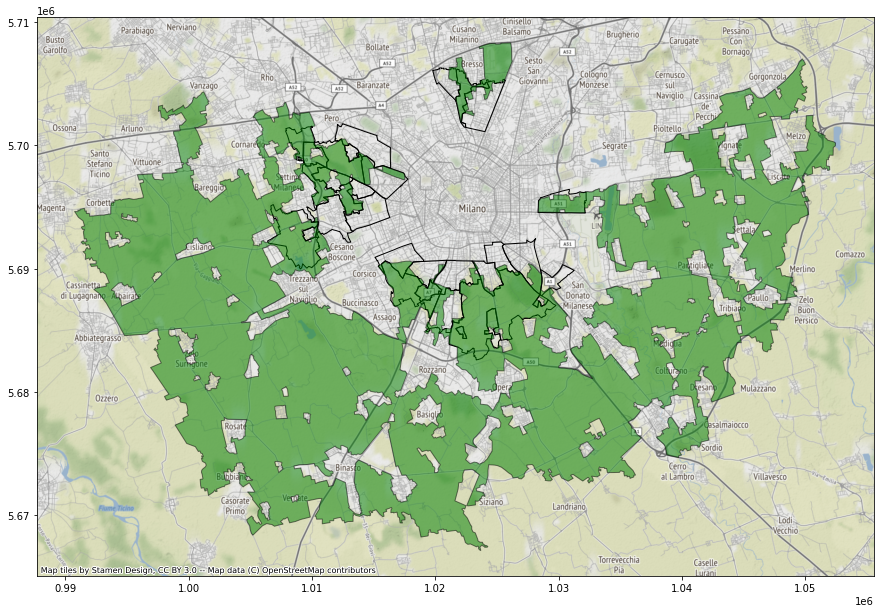

In [ ]:
ax = QuartieriParchi.to_crs(epsg=3857).plot(facecolor='none',figsize=(15,15),edgecolor='k')
Parchi_Milano.to_crs(epsg=3857).plot(ax=ax,facecolor='green',edgecolor='k',alpha=0.5)
ctx.add_basemap(ax)

dato il nome di un parco, avere la mappa del parco con i comuni che lo ospitano

Parco del Serio


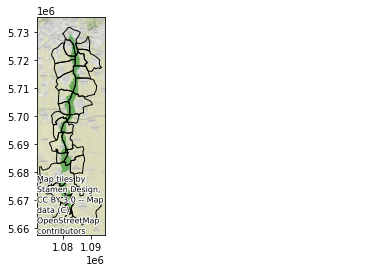

In [ ]:
parco = input()
parcoUtente = parchi[parchi.NOME == parco]
ComuneUtente = comuni[comuni.intersects(parcoUtente.geometry.squeeze())]
ax = parcoUtente.to_crs(3857).plot(facecolor='green',alpha=0.5)
ComuneUtente.to_crs(3857).plot(ax=ax,facecolor='none',edgecolor='k')
ctx.add_basemap(ax)

dato il nome di un parco, avere la mappa del parco con le province che attraversa

Parco del Serio


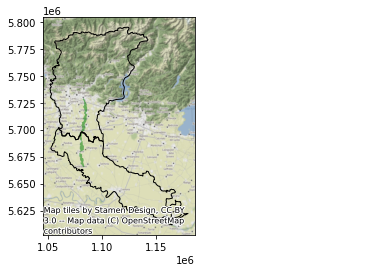

In [ ]:
parco = input()
parcoUtente = parchi[parchi.NOME == parco]
provinciaUTente = province[province.intersects(parcoUtente.geometry.squeeze())]
ax = parcoUtente.to_crs(3857).plot(facecolor='green',alpha=0.5)
provinciaUTente.to_crs(3857).plot(ax=ax,facecolor='none',edgecolor='k')
ctx.add_basemap(ax)

dato un comune, avere i parchi che ospita 

Milano


FID  ...                                           geometry
20   21  ...  POLYGON ((516502.662 5041742.040, 516403.321 5...
21   22  ...  POLYGON ((533691.079 5042919.602, 533758.703 5...

[2 rows x 11 columns]

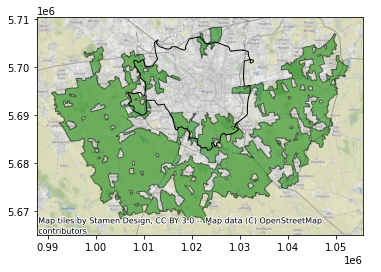

In [ ]:
comune = input()
comuniUtente = comuni[comuni.COMUNE==comune]
parchiUtente = parchi[parchi.intersects(comuniUtente.geometry.squeeze())]
ax = parchiUtente.to_crs(epsg=3857).plot(facecolor='green',edgecolor='k',alpha=0.5)
comuniUtente.to_crs(epsg=3857).plot(ax=ax,facecolor='none',edgecolor='k')
ctx.add_basemap(ax)
parchiUtente

dato il nome di una provincia, avere i parchi che ospita

Milano


8            Parco Adda Nord
9     Parco Valle del Ticino
18        Parco delle Groane
20         Parco Nord Milano
21          Parco Sud Milano
22            Parco Adda Sud
24          Parco Sud Milano
Name: NOME, dtype: object

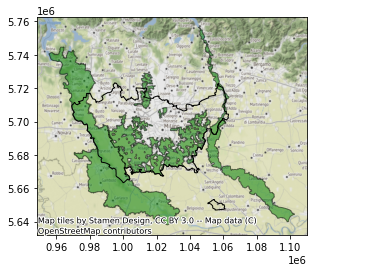

In [ ]:
provincia = input()
provinceUtenti = province[province.DEN_UTS == provincia]
ParchiUtente = parchi[parchi.intersects(provinceUtenti.geometry.squeeze())]
ax = ParchiUtente.to_crs(epsg=3857).plot(facecolor='green',edgecolor='k',alpha=0.5)
provinceUtenti.to_crs(epsg=3857).plot(ax=ax,facecolor='none',edgecolor='k')
ctx.add_basemap(ax)
ParchiUtente.NOME

**FINE ESERCIZIO 6**

[GeoPandasEsercizio7](https://colab.research.google.com/drive/1VfNa5y0MVIaeW-FgLClnu1cu6VDp5zz7#scrollTo=2dqAxhZkU8EU)

In [ ]:
Corsiacqua = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Corsi_acqua_Piano_di_Gestione/Corsi_acqua_Piano_di_Gestione.dbf')


visualizzi su una mappa i 10 corsi d'acqua più lunghi della provincia di Milano

In [ ]:
provMilano = province[province.DEN_UTS=='Milano']
provMilano

COD_RIP  ...                                           geometry
14        1  ...  MULTIPOLYGON (((538136.289 5004372.814, 539162...

[1 rows x 13 columns]

In [ ]:
corsiMilano = Corsiacqua[Corsiacqua.intersects(provMilano.geometry.squeeze())]
corsiMilano.sort_values('SHAPE_LEN',ascending=False).head(10)

OBJECTID  ...                                           geometry
18       124  ...  MULTILINESTRING ((478097.612 5045956.958, 4780...
36       593  ...  MULTILINESTRING ((541297.507 5041518.075, 5412...
10        84  ...  MULTILINESTRING ((541297.507 5041518.075, 5412...
0        188  ...  LINESTRING (480362.262 5040575.220, 480364.627...
7         65  ...  MULTILINESTRING ((483579.882 5034726.498, 4835...
31       501  ...  LINESTRING (541227.887 5050214.931, 541227.203...
26       357  ...  MULTILINESTRING ((495438.399 5047188.843, 4954...
8         66  ...  MULTILINESTRING ((477067.969 5044605.066, 4770...
15       112  ...  MULTILINESTRING ((516227.432 5021570.890, 5162...
1        191  ...  MULTILINESTRING ((494060.091 5029696.046, 4940...

[10 rows x 31 columns]

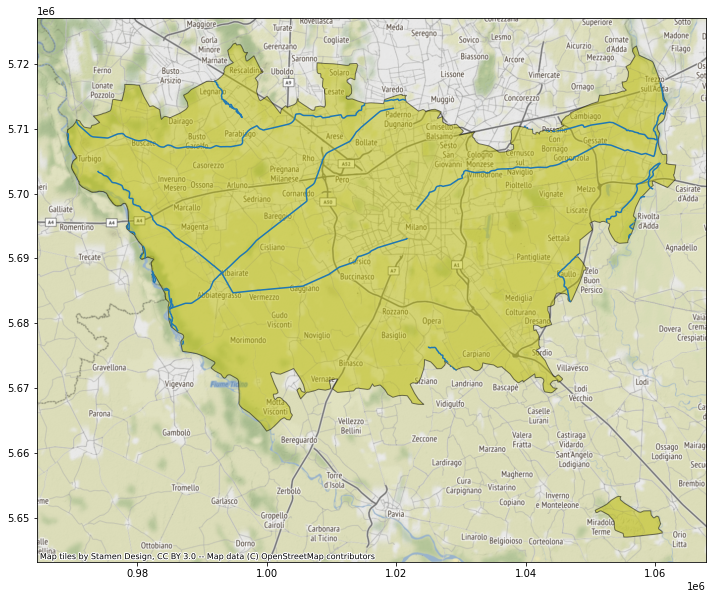

In [ ]:
ax = corsiMilano.sort_values('SHAPE_LEN',ascending=False).head(10).to_crs(epsg=3857).plot(figsize=(15,10))
provMilano.to_crs(epsg=3857).plot(ax=ax,facecolor='y',edgecolor='k',alpha=0.5)
ctx.add_basemap(ax)

visualizzi su una mappa i Navigli e i fiumi da cui prendono l'acqua. Utilizzare colori diversi per rappresentare i navigli rispetto ai fiumi ed evidenziare bene i percorsi sulla mappa

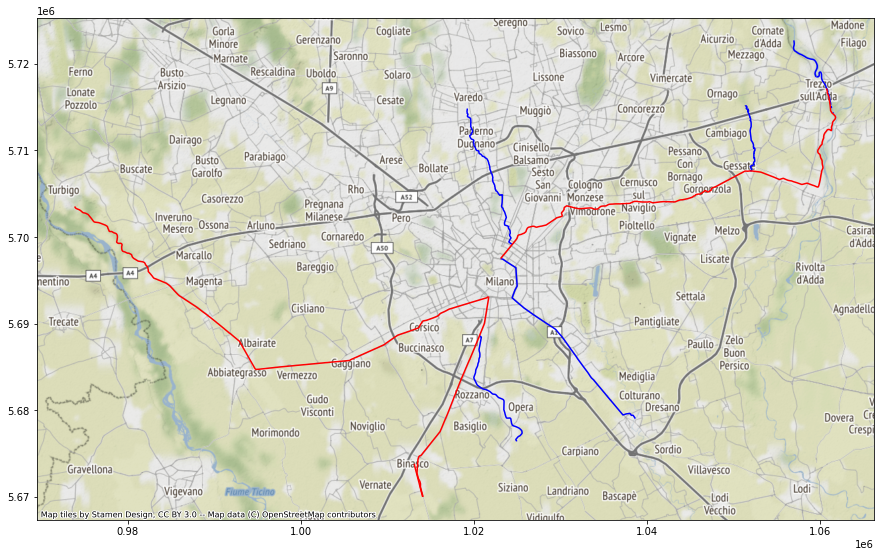

In [ ]:
navigli = Corsiacqua[Corsiacqua.NOME.str.contains('Navigli')]
fiumi = Corsiacqua[Corsiacqua.touches(navigli.unary_union)]
ax = fiumi.to_crs(epsg=3857).plot(figsize=(15,15),facecolor='none',color='blue')
navigli.to_crs(epsg=3857).plot(ax=ax,color='red')
ctx.add_basemap(ax)

visualizzi su una mappa i corsi d'acqua che passano in un comune inserito dall'utente

Milano


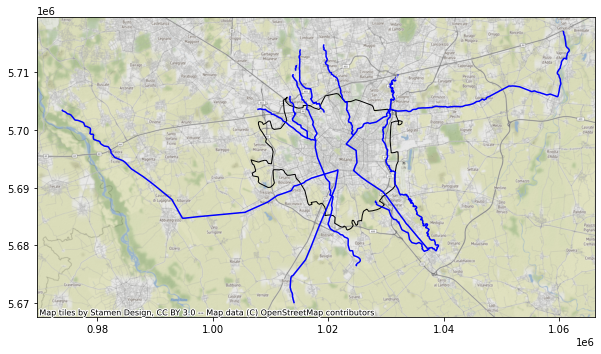

In [ ]:
comune = input()
comuniUtente = comuni[comuni.COMUNE == comune]
fiumiUtente = Corsiacqua[Corsiacqua.intersects(comuniUtente.geometry.squeeze())]
ax = fiumiUtente.to_crs(epsg=3857).plot(color='blue',edgecolor='k',figsize=(10,10))
comuniUtente.to_crs(epsg=3857).plot(ax=ax,facecolor='none',edgecolor='k')
ctx.add_basemap(ax)

visualizzi su una mappa un fiume inserito dall'utente con tutti i comuni che attraversa. Se attraversa Milano, visualizzare solo i quartieri che attraversa

Lambro (Fiume)


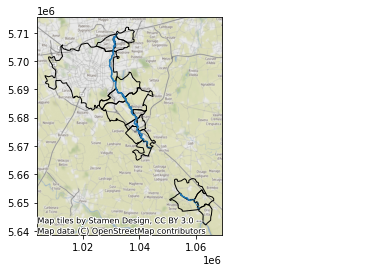

In [ ]:
user = input()
lst = list(Corsiacqua['NOME'])
if user not in lst:
  print('Fiume inesistente')
else:
  fiume = Corsiacqua[Corsiacqua.NOME==user]
  comunifiume = comuni[comuni.intersects(fiume.unary_union)]
  ax = comunifiume.to_crs(3857).plot(facecolor='none',edgecolor='k')
  fiume.to_crs(3857).plot(ax=ax,facecolor='none')
  ctx.add_basemap(ax)

visualizzi il numero di corsi d'acqua della provincia di Milano e la lunghezza totale di tutti i corsi d'acqua

In [ ]:
corsiMilano.NOME.count()

45

In [ ]:
corsiMilano.SHAPE_LEN

0     44301.215986
1     34035.857991
2     21811.145089
3     19767.119220
4     13180.757122
5      9403.459186
6     18403.681560
7     38206.257375
8     35927.352062
9     17917.785813
10    60521.688952
11     6596.411258
12    14141.256453
13    25148.287491
14    10073.652302
15    35449.017426
16    10660.764389
17    32235.689817
18    86549.137958
19     8405.867432
20    15071.263294
21     8067.517840
22    16721.551152
23     9492.563618
24    29443.002746
25     8813.722474
26    36885.391167
27    15816.452967
28    18469.448374
29     8204.459878
30    31345.312341
31    38123.487110
32    33448.858573
33    15629.880279
34    11941.330402
35    20751.104448
36    61066.374854
37    14562.124392
38    30035.106435
39    11169.001938
40    28383.224435
41    15724.066747
42    23140.131614
43    20640.150007
44    18105.747329
Name: SHAPE_LEN, dtype: float64

visualizzi su una mappa i comuni della provincia di Milano che non sono attraversati da corsi d'acqua